In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('C://Users//WELCOME//Downloads//labeled_data.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol',
       'timestamp', 'flow_duration', 'flow_byts_s', 'flow_pkts_s',
       'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts',
       'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len',
       'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean',
       'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot',
       'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean',
       'bwd_iat_std', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt',
       'psh_flag_cnt', 'ack_flag_c

In [7]:
df.columns

Index(['Unnamed: 0', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol',
       'timestamp', 'flow_duration', 'flow_byts_s', 'flow_pkts_s',
       'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts',
       'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len',
       'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean',
       'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot',
       'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean',
       'bwd_iat_std', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt',
       'psh_flag_cnt', 'ack_flag_c

In [8]:
totlen_fwd_pkts = df['totlen_fwd_pkts']
pd.unique(totlen_fwd_pkts)

array([    1264,       68,      775,      185,       77,      369,
            367,      368,       88,      409,      408,      407,
             60,      735,     1224,      815,      366,       59,
           8625,     6451,     6803,     6495,     6843,     2775,
           3352,       67,     3782,     1286,     2305,     1085,
             66,     1579,     8819,     1071,       62,     1243,
             87,    38566,     1326,     6984,     2221,    38188,
           1389,      863,     1303,     1279,     1343,     3626,
            406,     1987,      100,     2102,    35347,     7144,
           1119,     1143,     1263,    10595,    11503,     1304,
           3663,     1366,      156,    40164,     1196,     2232,
           3578,      991,    25996,    89813,      419,      459,
            458,      460,      457,      418,      420,    65654,
          24206,     1446,     1242,       61,     4702,     2740,
           4018,    40558,     5737,     1144,    10516,     7

In [9]:
flow_byts_s=df['flow_byts_s']
pd.unique(flow_byts_s)

array([ 2094.49585972,  4148.9020309 ,   735.06512174, ...,
       31719.86461157,   891.85358941, 15435.98646833])

In [10]:
flow_pkts_s=df['flow_pkts_s']
pd.unique(flow_pkts_s)

array([ 8.31620591, 45.84422134,  9.18332309, ..., 57.31084051,
       12.21717246, 42.04558793])

In [11]:
flow_duration=df['flow_duration']
pd.unique(flow_duration)

array([2525190.,   43626., 2504540., ...,  296628.,  163704.,  570809.])

In [12]:
bwd_pkts_s=df['bwd_pkts_s']
pd.unique(bwd_pkts_s)

array([ 4.35610786, 22.92211067,  4.791299  , ..., 30.34103321,
        6.10858623, 21.02279396])

In [13]:
flow_iat_max=df['flow_iat_max']
pd.unique(flow_iat_max)

array([1942423.,       0., 1642366., ..., 1259118.,   88367.,  149195.])

In [14]:
flow_iat_mean=df['flow_iat_mean']
pd.unique(flow_iat_mean)

array([126259.5       ,      0.        , 113842.72727273, ...,
        89422.43333333,  18539.25      ,  24817.7826087 ])

In [15]:
labels=df['Label']
pd.unique(labels)

array(['benign', 'attack'], dtype=object)

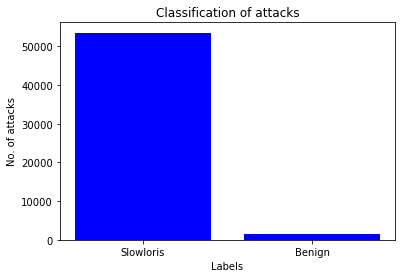

In [16]:
data = {'Slowloris':df['Label'].value_counts().attack, 'Benign':df['Label'].value_counts().benign}
courses = list(data.keys())
values = list(data.values())
plt.bar(courses, values, color ='blue')
plt.xlabel("Labels")
plt.ylabel("No. of attacks")
plt.title("Classification of attacks")
plt.show()

In [17]:
data = [df['flow_byts_s'], df['flow_pkts_s'],df['flow_duration'], df['bwd_pkts_s'],df['flow_iat_max'], df['flow_iat_mean'],df['Label']]

In [18]:
headers=['flow_byte','flow_pkt','flow_duration','bwd_pkt','flow_iat_max','flow_iat_mean','label']

In [19]:
df1 = pd.concat(data, axis=1, keys=headers)

In [20]:
df1

,flow_byte,flow_pkt,flow_duration,bwd_pkt,flow_iat_max,flow_iat_mean,label
0,2094.495860,8.316206,2525190.0,4.356108,1942423.0,126259.500000,benign
1,4148.902031,45.844221,43626.0,22.922111,0.0,0.000000,benign
2,735.065122,9.183323,2504540.0,4.791299,1642366.0,113842.727273,benign
3,1075.499313,18.479370,270572.0,7.391748,246293.0,67643.000000,benign
4,981.793380,8.688437,230191.0,4.344218,0.0,0.000000,benign
...,...,...,...,...,...,...,...
54961,1468.012966,14.903685,134195.0,7.451842,0.0,0.000000,benign
54962,1187.578805,14.661467,136412.0,7.330733,0.0,0.000000,benign
54963,31719.864612,57.310841,296628.0,30.341033,88367.0,18539.250000,benign
54964,891.853589,12.217172,163704.0,6.108586,0.0,0.000000,benign


In [21]:
df1.to_csv("slowloris_attributes.csv")

# Model Creation

In [22]:
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder

In [23]:
Encoder = LabelEncoder()
le = Encoder.fit(df1["label"])
df1["label"] = le.transform(df1["label"])

In [24]:
pd.unique(df1['label'])
# 1 = Benign
# 0 = Attack

array([1, 0])

In [25]:
df = pd.read_csv('slowloris_attributes.csv')


In [26]:
df.drop(columns=['Unnamed: 0'],inplace= True)


In [27]:
df['label'] = np.where(df['label'] == 'attack', 1, 0)

In [28]:
df

,flow_byte,flow_pkt,flow_duration,bwd_pkt,flow_iat_max,flow_iat_mean,label
0,2094.495860,8.316206,2525190.0,4.356108,1942423.0,126259.500000,0
1,4148.902031,45.844221,43626.0,22.922111,0.0,0.000000,0
2,735.065122,9.183323,2504540.0,4.791299,1642366.0,113842.727273,0
3,1075.499313,18.479370,270572.0,7.391748,246293.0,67643.000000,0
4,981.793380,8.688437,230191.0,4.344218,0.0,0.000000,0
...,...,...,...,...,...,...,...
54961,1468.012966,14.903685,134195.0,7.451842,0.0,0.000000,0
54962,1187.578805,14.661467,136412.0,7.330733,0.0,0.000000,0
54963,31719.864612,57.310841,296628.0,30.341033,88367.0,18539.250000,0
54964,891.853589,12.217172,163704.0,6.108586,0.0,0.000000,0


In [29]:
df['label']

0        0
1        0
2        0
3        0
4        0
        ..
54961    0
54962    0
54963    0
54964    0
54965    0
Name: label, Length: 54966, dtype: int32

In [30]:
X = df.drop(columns=['label'])
y = df['label']

In [31]:
X

,flow_byte,flow_pkt,flow_duration,bwd_pkt,flow_iat_max,flow_iat_mean
0,2094.495860,8.316206,2525190.0,4.356108,1942423.0,126259.500000
1,4148.902031,45.844221,43626.0,22.922111,0.0,0.000000
2,735.065122,9.183323,2504540.0,4.791299,1642366.0,113842.727273
3,1075.499313,18.479370,270572.0,7.391748,246293.0,67643.000000
4,981.793380,8.688437,230191.0,4.344218,0.0,0.000000
...,...,...,...,...,...,...
54961,1468.012966,14.903685,134195.0,7.451842,0.0,0.000000
54962,1187.578805,14.661467,136412.0,7.330733,0.0,0.000000
54963,31719.864612,57.310841,296628.0,30.341033,88367.0,18539.250000
54964,891.853589,12.217172,163704.0,6.108586,0.0,0.000000


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [33]:
len(X_train)

41224

In [34]:
len(X_test)

13742

In [35]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [36]:
y_train.value_counts()

1    40151
0    40151
Name: label, dtype: int64

In [44]:
len(X_train)

80302

In [38]:
train_dataset = pd.concat([X_train,y_train],axis=1)
test_dataset = pd.concat([X_test,y_test],axis=1)


In [39]:
train_dataset

,flow_byte,flow_pkt,flow_duration,bwd_pkt,flow_iat_max,flow_iat_mean,label
0,254.777912,4.129302,2.421717e+06,2.064651,2.387357e+06,2.690797e+05,1
1,197.422769,2.941121,2.720051e+06,1.470561,2.711228e+06,3.885787e+05,1
2,200.178027,2.993316,2.672621e+06,1.496658,2.666225e+06,3.818030e+05,1
3,244.847153,3.647630,2.193205e+06,1.823815,2.179537e+06,3.133150e+05,1
4,34.399764,0.548641,1.822687e+07,0.274320,1.633477e+07,2.025208e+06,1
...,...,...,...,...,...,...,...
80297,119.612897,1.453446,1.603409e+07,0.726723,1.525074e+07,7.325073e+05,0
80298,782.335599,7.252482,2.759227e+05,3.626241,0.000000e+00,0.000000e+00,0
80299,1375.747316,7.061394,2.871060e+06,3.530697,2.401524e+06,1.500959e+05,0
80300,3407.778936,12.422678,1.536030e+06,6.497515,1.101854e+06,9.083928e+04,0


exp = setup(data = train_dataset, target='label', train_size = 1.0, preprocess = True, test_data = test_dataset, session_id=1, use_gpu=True)

# Logistic Regression

In [42]:
lr_model=create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9904,0.9945,0.9943,0.9867,0.9905,0.9808,0.9809
1,0.9924,0.9952,0.9965,0.9884,0.9924,0.9848,0.9848
2,0.9922,0.9951,0.9955,0.9889,0.9922,0.9843,0.9843
3,0.9932,0.9951,0.9978,0.9886,0.9932,0.9863,0.9863
4,0.9925,0.9974,0.9953,0.9898,0.9925,0.9851,0.9851
5,0.9928,0.9965,0.9963,0.9894,0.9928,0.9856,0.9856
6,0.9925,0.9946,0.9960,0.9891,0.9926,0.9851,0.9851
7,0.9922,0.9954,0.9965,0.9879,0.9922,0.9843,0.9843
8,0.9945,0.9956,0.9970,0.9921,0.9945,0.9890,0.9891
9,0.9920,0.9968,0.9958,0.9884,0.9921,0.9841,0.9841


In [69]:
lr_model.predict(X_test)
predictions_lr = lr_model.predict(X_test)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       330
           1       1.00      1.00      1.00     13412

    accuracy                           1.00     13742
   macro avg       0.93      0.98      0.96     13742
weighted avg       1.00      1.00      1.00     13742



In [73]:
conf_mat_lr = confusion_matrix(y_test,predictions_lr)
print(conf_mat_lr)

[[  320    10]
 [   51 13361]]


In [77]:
print("Accuracy : ",accuracy_score(predictions_lr, y_test)*100)

Accuracy :  99.55610537039732


# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf_clf = rf.fit(X_train,y_train)
predictions_rf = rf_clf.predict(X_test)

In [72]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       1.00      1.00      1.00     13412

    accuracy                           1.00     13742
   macro avg       1.00      1.00      1.00     13742
weighted avg       1.00      1.00      1.00     13742



In [74]:
conf_mat_rf = confusion_matrix(y_test,predictions_rf)
print(conf_mat_rf)

[[  329     1]
 [    0 13412]]


In [76]:
print("Accuracy : ",accuracy_score(predictions_rf, y_test)*100)

Accuracy :  99.99272303885898


# LGBM

In [78]:
import lightgbm

In [80]:
lgbm= lightgbm.LGBMClassifier()
lgbm_clf = lgbm.fit(X_train,y_train)
predictions_lgbm = lgbm_clf.predict(X_test)

In [81]:
print(classification_report(y_test,predictions_lgbm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       330
           1       1.00      1.00      1.00     13412

    accuracy                           1.00     13742
   macro avg       1.00      0.99      1.00     13742
weighted avg       1.00      1.00      1.00     13742



In [82]:
conf_mat_lgbm = confusion_matrix(y_test,predictions_lgbm)
print(conf_mat_lgbm)

[[  326     4]
 [    0 13412]]


In [83]:
print("Accuracy : ",accuracy_score(predictions_lgbm, y_test)*100)

Accuracy :  99.97089215543589


# ADA BOOST

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
ada = AdaBoostClassifier()
ada_clf = ada.fit(X_train,y_train)
predictions_ada = ada_clf.predict(X_test)

In [87]:
print(classification_report(y_test,predictions_ada))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       330
           1       1.00      1.00      1.00     13412

    accuracy                           1.00     13742
   macro avg       0.98      0.99      0.99     13742
weighted avg       1.00      1.00      1.00     13742

